# Project 2020

These are my solutions to the Project for the module Machine Learning and Statistics at GMIT. The author is Alexandra Macuga (G00376287@gmit.ie).

This is a Jupyter notebook that trains a model using the dataset. In the notebook I will explain my model and give an analysis of its accuracy.

## Dataset

Import the required modules and have a look at the dataset.

In [1]:
# Numerical arrays.
import numpy as np

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Machine Learning- split dataset
from sklearn.model_selection import train_test_split

# Plotting.
import matplotlib.pyplot as plt

# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Neural networks.
import tensorflow.keras as kr

In [2]:
# Data set.
df = pd.read_csv("powerproduction.csv")
# Numpy array
data = df.values

In [3]:
# Preview the first 10 lines of the loaded data 
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [4]:
# Statistics
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


We have two columns in the dataset- *speed* and *power*. There is 500 values in both columns. The column *speed* has values between 0 to 25, and the column *power* has values between 0 to 113.556. 

## Plot the dataset

<AxesSubplot:xlabel='speed', ylabel='power'>

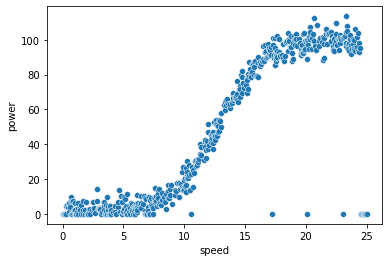

In [5]:
# plotusing seaborn scatterplot
sns.scatterplot(x = "speed", y = "power", data = df)

Based on the plot, it looks like there is a linear relatioship between speed and power. The higher the wind, the higher the power. However, in some observations where the speed is over 10, the power is 0. This can have a lot of reasons like recording errors, failures, maintenance etc. As outliers can skew statistical measures and data distributions, we should remove them from dataset.

In [6]:
# Count how many observations have power = 0 and speed > 10 (outliers)
df[(df.power == 0) & (df.speed >= 10)].count()

speed    14
power    14
dtype: int64

In [7]:
# Remove outliers from dataset
df = df.drop(df.loc[(df.power == 0) & (df.speed >= 10)].index)
df.count()

speed    486
power    486
dtype: int64

In [8]:
df.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000


I decided to remove 14 observations from the dataset. The observations are outliers, where the speed was higher than 10 and the power was 0. There is 486 observations in the dataset now. The column speed has values between 0 to 24.399, and the column power has values between 0 to 113.556.

In [9]:
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(486, 1) (486,)
(388, 1) (98, 1) (388,) (98,)


Split the dataset into train set and test set. There is 388 observations in the train dataset and 98 observations in the test dataset. 

## K-Means Clustering

The **KMeans** algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.[2]

In [10]:
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=3, random_state=1).fit(data)

In [11]:
# See the labels of the points.
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1,

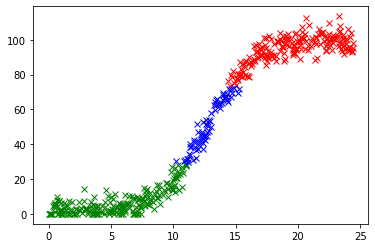

In [12]:
# Plot the data set.
# Issue fixed from: https://stackoverflow.com/a/57317580

plt.plot(data[kmeans.labels_ == 0][:,0], data[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(data[kmeans.labels_ == 1][:,0], data[kmeans.labels_ == 1][:,1], 'rx')
plt.plot(data[kmeans.labels_ == 2][:,0], data[kmeans.labels_ == 2][:,1], 'bx')

## Statsmodels

**Statsmodels** is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct.[1]

In [13]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(data)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.812e+33
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:25:42   Log-Likelihood:                 14777.
No. Observations:                 486   AIC:                        -2.955e+04
Df Residuals:                     483   BIC:                        -2.954e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.809e-14    1.7e-15    -16.478      0.0

[1] https://www.statsmodels.org/stable/index.html

[2] https://scikit-learn.org/stable/modules/clustering.html#k-means

## Regression in keras
### Polynomial

In [14]:
poly = pd.DataFrame()
poly['x'] = np.linspace(-10.0, 10.0, 1000)
poly['y'] = poly['x'].apply(f)

NameError: name 'f' is not defined

In [ ]:
# Have a look.
plt.plot(poly['x'], poly['y']);

In [ ]:
# Re-build our model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation='linear', kernel_initializer="ones", bias_initializer="zeros"))
model.compile('adam', loss='mean_squared_error')

In [ ]:
# Fit the data.
model.fit(poly['x'], poly['y'], epochs=500)

In [ ]:
# Plot the predictions (on the training set itself).
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();

### Sigmoids

In [ ]:
# Change the activation function.
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer="ones", bias_initializer="zeros"))
model.compile('adam', loss='mean_squared_error')

In [ ]:
# Without training, let's have a look at the output.
sigdata = data
sigdata['x'] = data.speed
sigdata['y'] = data.power

In [ ]:
# Let's see what that looks like.
plt.plot(sigdata['x'], sigdata['y']);

### Back to the polynomial

In [ ]:
# Same polynomial.
f = lambda x: 2.0 * x**2 + 3.0 * x + 4.0

poly = pd.DataFrame()
poly['x'] = np.linspace(-10.0, 10.0, 1000)
poly['y'] = poly['x'].apply(f)

In [ ]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [ ]:
# Fit the data.
model.fit(poly['x'], poly['y'], epochs=500, batch_size=10)

In [ ]:
# Now let's see.
plt.plot(poly['x'], poly['y'], label='actual')
plt.plot(poly['x'], model.predict(poly['x']), label='prediction')
plt.legend();